In [1]:
import random as rd
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import shutil
import os

In [2]:
#Gifts generation
n_gifts = 3
max_tries = 200
verbose = True
#Roulette
total_frames_0 = 45
power = 1.2
start_slow_0 = 33
total_before = 20

In [3]:
def initialization():
    family_dict = {
    "Maman":  {"is_Bretonniere": True,  "couple" : [""],      "gifts_to": [], "gifts_received":0},
    "PA":     {"is_Bretonniere": True,  "couple" : ["Lidia"], "gifts_to": [], "gifts_received":0}, 
    "Lidia":  {"is_Bretonniere": False, "couple" : ["PA"],    "gifts_to": [], "gifts_received":0},
    "Claire": {"is_Bretonniere": True,  "couple" : ["Adrien"],"gifts_to": [], "gifts_received":0},
    "Adrien": {"is_Bretonniere": False, "couple" : ["Claire"],"gifts_to": [], "gifts_received":0},
    "Arnaud": {"is_Bretonniere": True,  "couple" : ["AL"],    "gifts_to": [], "gifts_received":0},
    "AL":     {"is_Bretonniere": False, "couple" : ["Arnaud"],"gifts_to": [], "gifts_received":0},
    "Hubert": {"is_Bretonniere": True, "couple" : [""],      "gifts_to": [], "gifts_received":0}
    }
    return family_dict

In [4]:
family_dict=initialization()
n_people = len(family_dict)
max_combinations = math.comb(n_people-1,n_gifts)
people = list(family_dict.keys())

In [5]:
def check_bretonniere(test):
    has_bretonniere = any(family_dict[test[i]]['is_Bretonniere'] for i in range(len(test)))
    return has_bretonniere

In [6]:
#test = rd.sample(list(family_dict.keys()),k=n_gifts)

#print(test)
#print(type(test))
#person="AL"
#test=["AL","Adrien","Lidia"]
def validation(test, person):
    valid_list=True
#    check_bretonniere = has_bretonniere(test)
    if family_dict[person]["couple"][0] in test:
     #   if verbose:
     #       print("couple")
        valid_list=False
    has_bretonniere=check_bretonniere(test)
    if not has_bretonniere:
      #  if verbose:
      #      print("no Bretonniere")
        valid_list = False
    for gifted in test:
            if family_dict[gifted]["gifts_received"] >= 3:
                valid_list = False
#                print("Problem: already", family_dict[gifted]["gifts_received"], "gifts for ", gifted )
        
#optimized:
    #valid_list = not any(family_dict[gifted]["gifts_received"] >= 3 for gifted in test)
    return valid_list

#validation(test,person)

In [7]:
def display_gifts(family_dict):
    for p in list(family_dict.keys()):
        print(p,"offers to",family_dict[p]["gifts_to"], family_dict[k]["gifts_received"],"gifts received")               

In [8]:
for j in range(1,max_tries+1):
   # print("try ",j)
    family_dict=initialization()
    for i in range(0,n_people):
        person=list(family_dict.keys())[i]
    #    print("Generating presents for ",person,"( try #",j,")",i)
        valid_list = False
        max=1
        tested_list=[]
        while not valid_list and max <= math.comb(n_people-1,n_gifts):
            reduced_list = [ name  for name in list(family_dict.keys()) if name != person]
            list_test = sorted(rd.sample(reduced_list,k=n_gifts))
            if not list_test in tested_list:
                tested_list.append(list_test)
          #      if verbose:
          #          print("Testing",list_test, "(",max,"/",max_combinations,")")
                valid_list = validation(list_test,person)
                max+=1
            if max == max_combinations:
                if verbose:
          #          print("all combinations tested")
                    if family_dict[gifted]["gifts_received"] != 3:
                        valid_list = False
                break 
            
        if valid_list:
            family_dict[person]["gifts_to"]=list_test
            for gifted in list(family_dict[person]["gifts_to"]):
                family_dict[gifted]["gifts_received"]+=1
 #               print("adding 1 present to",gifted,". Now has ",family_dict[gifted]["gifts_received"],"presents.")
           # if verbose:
           #     for k in list(family_dict.keys()):
           #         print(k)
   #                 print(family_dict[k]["gifts_to"],family_dict[k]["gifts_received"])
           # print("----")
            if i==n_people-1:
  #              print("Found! (after ",j,"tries)")
                j=max_tries
                break
    
        else:
    #        print("No valid list found after ",j,"tries")
  #          display_gifts(family_dict)
            break
            
    if valid_list and i==n_people -1 :
        break
#display_gifts(family_dict)     

In [9]:
#instead of the generate_random_sequence that generates numbers (with no 2 consecutive ones), we generate a list of names
def generate_random_names_sequence(n,people):
    rd.shuffle(people)
    random_names_sequence = []

    for i in range(n):
    # Ensure that consecutive elements are not the same
        while True:
            name = rd.choice(people)
            if not random_names_sequence or random_names_sequence[-1] != name:
                random_names_sequence.append(name)
                break
    return random_names_sequence

generate_random_names_sequence(10,people)

['Adrien',
 'Claire',
 'Lidia',
 'Adrien',
 'Claire',
 'PA',
 'AL',
 'Claire',
 'Hubert',
 'Claire']

In [10]:
def create_image_list(gifter,family_dict,total_frames):

    #La derniere image de "gifter", c'est "pics/"+family_dict[gifter]["gifts_to"][i]+".png", avec i=0,1,2 . C'est ça qu'il faut mettre.

    list_imgs_0 = []
    list_imgs_1 = []
    list_imgs_2 = []
    people = list(family_dict.keys())
    rdms = generate_random_names_sequence(total_frames,people)
    for i, nb in enumerate(rdms):
        if i < start_slow_0:
            list_imgs_0.append("pics/"+nb+".png")
        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
 #               list_imgs_0.append(nb) -> 
 #               list_imgs_0.append("pics/"+family_dict[gifter]["gifts_to"][0]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_0
                list_imgs_0.append("pics/"+nb+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_0
#Là c'est completement random, comme toi avant


    start_slow_1 = int(3*len(list_imgs_0) / 4)
# 
# change last roulette0 here

    rdms1 = generate_random_names_sequence(start_slow_1,people)
    rdms2 = generate_random_names_sequence(start_slow_1,people)
   
    for i, nb in enumerate(rdms1):
        list_imgs_1.append("pics/"+nb+".png")
        list_imgs_2.append("pics/"+rdms2[i]+".png")
    #    list_imgs_0.append(list_imgs_0[-1])
        list_imgs_0.append("pics/"+family_dict[gifter]["gifts_to"][0]+".png") #c'est que là que je mets la derniere image
                


    rdms = generate_random_names_sequence(total_frames,people)

    for i, nb in enumerate(rdms):
        if i < start_slow_0:
#            list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png")
            list_imgs_1.append("pics/"+nb+".png")

        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
#                list_imgs_1.append(nb%8)
#                list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_1
                list_imgs_1.append("pics/"+nb+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_1
 #Là c'est completement random, comme toi avant

    start_slow_2 = int(1*len(list_imgs_1) / 2)

# change last roulette1 here

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        list_imgs_2.append("pics/"+nb+".png")  #Là c'est completement random, comme toi avant

#        list_imgs_2.append(nb%8)
#        list_imgs_1.append(list_imgs_1[-1])
        list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png") #c'est que là que je mets la derniere image
        list_imgs_0.append(list_imgs_0[-1]) #là je continue à repeter la meme image (non aleatoire) pour le 1er cadran

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        if i < start_slow_0:
#            list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png")
            list_imgs_2.append("pics/"+nb+".png")  #Là c'est completement random, comme toi avant



        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
#                list_imgs_2.append(nb%8) 
#                list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_2
                list_imgs_2.append("pics/"+nb+".png")  #Là c'est completement random, comme toi avant

                
    list_imgs_2[-1]="pics/"+family_dict[gifter]["gifts_to"][2]+".png" #je remplace vraiment que la toute derniere image pour le 3e cadran

    total_frames = len(list_imgs_2)
 #   print(total_frames)
#    print("last frame of each:",list_imgs_0[-1],list_imgs_1[-1],list_imgs_2[-1])
    
    #Overwrite 1st image of each list (1st frame of the video) with non list 
    unique_list_of_people=rd.sample(people,3)
    list_imgs_0[0], list_imgs_1[0], list_imgs_2[0] = ["pics/"+unique_list_of_people[i]+".png" for i in range(3)]
    
 
    return list_imgs_0, list_imgs_1, list_imgs_2, total_frames
    
# change last roulette1 here

In [11]:
def strecth_firework(x, y):
    # Convert x and y values to pixel values
    x_pixels = [val * 432 for val in x]
    y_pixels = [val * 470 for val in y]
    return x_pixels, y_pixels

In [16]:

def create_video(gifter,family_dict,total_frames_0, total_frames_fireworks):
    s1 = 100
    s2 = 30
    print("Creating images")
    list_imgs_0, list_imgs_1, list_imgs_2, total_frames = create_image_list(gifter,family_dict,total_frames_0)
    print("Images created")
    total_before_explosion = total_frames + total_before
    total_frame_roulette = total_frames + 0
    total_frames += total_frames_fireworks
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    fig.patch.set_facecolor([150/255, 40/255, 28/255])
    rdm_angles_red = np.random.uniform(0, 2*np.pi, 100)
    rdm_angles_blue = np.random.uniform(0, 2*np.pi, 100)
    rdm_angles_green = np.random.uniform(0, 2*np.pi, 100)

    radii_red = np.logspace(0, 0.5, 30)/20 - 0.05
    radii_blue = np.logspace(0, 0.5, 30)/15 - 0.06
    radii_green = np.logspace(0, 0.5, 30)/25 - 0.04

    x_red = np.linspace(0.5, 0.8, total_frames)
    y_red = (-1/(x_red**0.5) + 1.45)
    plt.plot(x_red, y_red)
    x_green = np.linspace(0.45, 0.7, total_frames)
    y_green = (-1/(x_green**0.8)) + 2.
    plt.plot(x_green, y_green)

    x_blue = np.linspace(0.4, 0.2, total_frames)
    y_blue = -1/(x_blue**0.3)+1.7
    plt.plot(-x_blue+0.6, y_blue)

    def init_video():
        ax[0].clear()
        return []
    
    def update_video(frame):
        print("Frame",frame)
        if frame < total_frame_roulette:
    #     print(frame+1%8)
            ax[0].clear()
        # Your plotting code here
            ax[0].imshow(Image.open(list_imgs_0[frame]), extent=[0, 432, 0, 470])
        
            ax[1].clear()
        # Your plotting code here
            ax[1].imshow(Image.open(list_imgs_1[frame]), extent=[0, 432, 0, 470])
        
            ax[2].clear()
        # Your plotting code here
            ax[2].imshow(Image.open(list_imgs_2[frame]), extent=[0, 432, 0, 470])
            for i in range(3):
                ax[i].set_xticks([])
                ax[i].set_yticks([])
        
        # launch fireworks
        if frame > total_frame_roulette:
                # try:
                ax[0].clear()
                ax[1].clear()
                ax[2].clear()

                ax[0].imshow(Image.open(list_imgs_0[-1]), extent=[0, 432, 0, 470])
                ax[1].imshow(Image.open(list_imgs_1[-1]), extent=[0, 432, 0, 470])
                ax[2].imshow(Image.open(list_imgs_2[-1]), extent=[0, 432, 0, 470])
                
                if frame < total_frames - 10:
                     alpha = 1
                else:
                     alpha = (total_frames - frame) / 10 -0.1
                if frame < total_before_explosion:
                    ax[0].scatter(x_red[frame-total_frame_roulette], y_red[frame-total_frame_roulette], c='red', s=s1)
                    ax[0].scatter(x_green[frame-total_frame_roulette], y_green[frame-total_frame_roulette], c='green', s=s1)
                    ax[0].scatter(x_blue[frame-total_frame_roulette], y_blue[frame-total_frame_roulette], c='blue', s=s1)
                    
                    ax[1].scatter(x_red[frame-total_frame_roulette], y_red[frame-total_frame_roulette], c='red', s=s1)
                    ax[1].scatter(x_green[frame-total_frame_roulette], y_green[frame-total_frame_roulette], c='green', s=s1)
                    ax[1].scatter(x_blue[frame-total_frame_roulette], y_blue[frame-total_frame_roulette], c='blue', s=s1)
                    
                    ax[2].scatter(x_red[frame-total_frame_roulette], y_red[frame-total_frame_roulette], c='red', s=s1)
                    ax[2].scatter(x_green[frame-total_frame_roulette], y_green[frame-total_frame_roulette], c='green', s=s1)
                    ax[2].scatter(x_blue[frame-total_frame_roulette], y_blue[frame-total_frame_roulette], c='blue', s=s1)
                    for i in range(3):
                        ax[i].set_xticks([])
                        ax[i].set_yticks([])
                else:
                    rdms_x = np.random.normal(0, 1, 100)
                    rdms_y = np.random.normal(0, 1, 100)
                    
                    explosion_x_red = radii_red[frame-total_frame_roulette-total_before]*np.cos(rdm_angles_red)
                    explosion_y_red = radii_red[frame-total_frame_roulette-total_before]*np.sin(rdm_angles_red)
                    explosion_x_green = radii_green[frame-total_frame_roulette-total_before]*np.cos(rdm_angles_green)
                    explosion_y_green = radii_green[frame-total_frame_roulette-total_before]*np.sin(rdm_angles_green)
                    explosion_x_blue = radii_blue[frame-total_frame_roulette-total_before]*np.cos(rdm_angles_blue)
                    explosion_y_blue = radii_blue[frame-total_frame_roulette-total_before]*np.sin(rdm_angles_blue)
                    
                    for i in range(3):
                        ax[i].scatter(x_red[frame-total_frame_roulette] + explosion_x_red+ rdms_x,
                                    y_red[frame-total_frame_roulette]+ + explosion_y_red + rdms_y,
                                    s=s2, c='red', alpha=alpha)
                        ax[i].scatter(x_green[frame-total_frame_roulette] + explosion_x_green+ rdms_x,
                                    y_green[frame-total_frame_roulette]+ + explosion_y_green + rdms_y,
                                    s=s2, c='green', alpha=alpha)
                        ax[i].scatter(x_blue[frame-total_frame_roulette] + explosion_x_blue+ rdms_x,
                                    y_blue[frame-total_frame_roulette]+ explosion_y_blue + rdms_y,
                                    s=s2, c='blue', alpha=alpha)
                    
                    for i in range(3):
                        ax[i].set_xticks([])
                        ax[i].set_yticks([])
    ani = FuncAnimation(fig, update_video, frames=total_frames, init_func=init_video, repeat=False, interval=50)
    ani.save(gifter+'/roulette.mp4')#, dpi=5)

Generating video for  Maman
Creating images
Images created
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
Frame 13
Frame 14
Frame 15
Frame 16
Frame 17
Frame 18
Frame 19
Frame 20
Frame 21
Frame 22
Frame 23
Frame 24
Frame 25
Frame 26
Frame 27
Frame 28
Frame 29
Frame 30
Frame 31
Frame 32
Frame 33
Frame 34
Frame 35
Frame 36
Frame 37
Frame 38
Frame 39
Frame 40
Frame 41
Frame 42
Frame 43
Frame 44
Frame 45
Frame 46
Frame 47
Frame 48
Frame 49
Frame 50
Frame 51
Frame 52
Frame 53
Frame 54
Frame 55
Frame 56
Frame 57
Frame 58
Frame 59
Frame 60
Frame 61
Frame 62
Frame 63
Frame 64
Frame 65
Frame 66
Frame 67
Frame 68
Frame 69
Frame 70
Frame 71
Frame 72
Frame 73
Frame 74
Frame 75
Frame 76
Frame 77
Frame 78
Frame 79
Frame 80
Frame 81
Frame 82
Frame 83
Frame 84
Frame 85
Frame 86
Frame 87
Frame 88
Frame 89
Frame 90
Frame 91
Frame 92
Frame 93
Frame 94
Frame 95
Frame 96
Frame 97
Frame 98
Frame 99
Frame 100
Frame 101
Frame 102
Frame 103
Frame 104
F

Frame 79
Frame 80
Frame 81
Frame 82
Frame 83
Frame 84
Frame 85
Frame 86
Frame 87
Frame 88
Frame 89
Frame 90
Frame 91
Frame 92
Frame 93
Frame 94
Frame 95
Frame 96
Frame 97
Frame 98
Frame 99
Frame 100
Frame 101
Frame 102
Frame 103
Frame 104
Frame 105
Frame 106
Frame 107
Frame 108
Frame 109
Frame 110
Frame 111
Frame 112
Frame 113
Frame 114
Frame 115
Frame 116
Frame 117
Frame 118
Frame 119
Frame 120
Frame 121
Frame 122
Frame 123
Frame 124
Frame 125
Frame 126
Frame 127
Frame 128
Frame 129
Frame 130
Frame 131
Frame 132
Frame 133
Frame 134
Frame 135
Frame 136
Frame 137
Frame 138
Frame 139
Frame 140
Frame 141
Frame 142
Frame 143
Frame 144
Frame 145
Frame 146
Frame 147
Frame 148
Frame 149
Frame 150
Frame 151
Frame 152
Frame 153
Frame 154
Frame 155
Frame 156
Frame 157
Frame 158
Frame 159
Frame 160
Frame 161
Frame 162
Frame 163
Frame 164
Frame 165
Frame 166
Frame 167
Frame 168
Frame 169
Frame 170
Frame 171
Frame 172
Frame 173
Frame 174
Frame 175
Frame 176
Frame 177
Frame 178
Frame 179
Frame 180
F

Frame 157
Frame 158
Frame 159
Frame 160
Frame 161
Frame 162
Frame 163
Frame 164
Frame 165
Frame 166
Frame 167
Frame 168
Frame 169
Frame 170
Frame 171
Frame 172
Frame 173
Frame 174
Frame 175
Frame 176
Frame 177
Frame 178
Frame 179
Frame 180
Frame 181
Frame 182
Frame 183
Frame 184
Frame 185
Frame 186
Frame 187
Frame 188
Frame 189
Frame 190
Frame 191
Frame 192
Frame 193
Frame 194
Frame 195
Frame 196
Frame 197
Frame 198
Frame 199
Frame 200
Frame 201
Frame 202
Frame 203
Frame 204
Frame 205
Frame 206
Frame 207
Frame 208
Frame 209
Frame 210
Frame 211
Frame 212
Frame 213
Frame 214
Frame 215
Frame 216
Frame 217
Frame 218
Frame 219
Frame 220
Frame 221
Frame 222
Frame 223
Frame 224
Frame 225
Frame 226
Frame 227
Frame 228
Frame 229
Frame 230
Frame 231
Frame 232
Frame 233
Frame 234
Frame 235
Frame 236
Frame 237
Frame 238
Frame 239
Frame 240
Frame 241
Frame 242
Frame 243
Frame 244
Frame 245
Frame 246
Frame 247
Frame 248
Frame 249
Frame 250
Frame 251
Frame 252
Frame 253
Frame 254
Frame 255
Frame 256


Frame 233
Frame 234
Frame 235
Frame 236
Frame 237
Frame 238
Frame 239
Frame 240
Frame 241
Frame 242
Frame 243
Frame 244
Frame 245
Frame 246
Frame 247
Frame 248
Frame 249
Frame 250
Frame 251
Frame 252
Frame 253
Frame 254
Frame 255
Frame 256
Frame 257
Frame 258
Frame 259
Frame 260
Frame 261
Frame 262
Frame 263
Frame 264
Frame 265
Frame 266
Frame 267
Frame 268
Frame 269
Frame 270
Frame 271
Frame 272
Frame 273
Frame 274
Frame 275
Frame 276
Frame 277
Frame 278
Frame 279
Frame 280
Frame 281
Frame 282
Frame 283
Frame 284
Frame 285
Frame 286
Frame 287
Frame 288
Frame 289
Frame 290
Frame 291
Frame 292
Frame 293
Frame 294
Frame 295
Frame 296
Frame 297
Frame 298
Frame 299
Frame 300
Frame 301
Frame 302
Frame 303
Frame 304
Frame 305
Frame 306
Frame 307
Frame 308
Frame 309
Frame 310
Frame 311
Frame 312
Frame 313
Frame 314
Frame 315
Frame 316
Frame 317
Frame 318
Frame 319
Frame 320
Frame 321
Frame 322
Frame 323
Frame 324
Frame 325
Frame 326
Frame 327
Frame 328
Frame 329
Frame 330
Frame 331
Frame 332


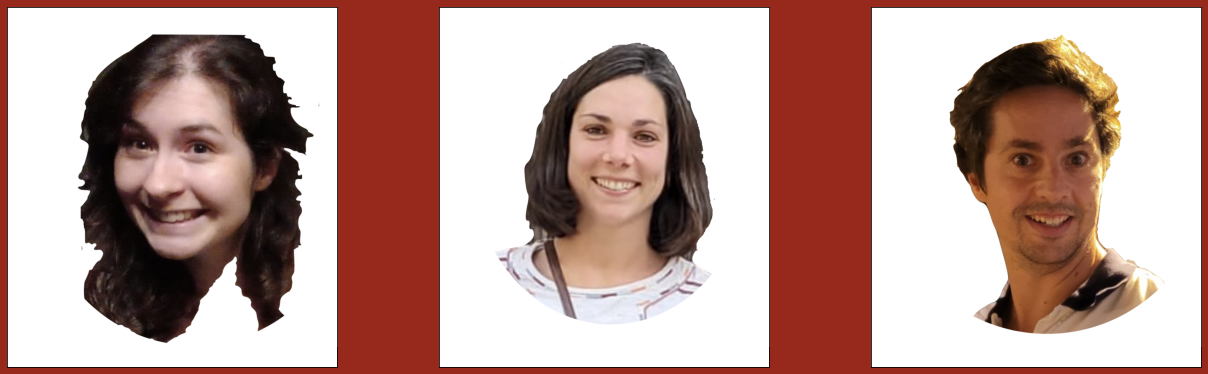

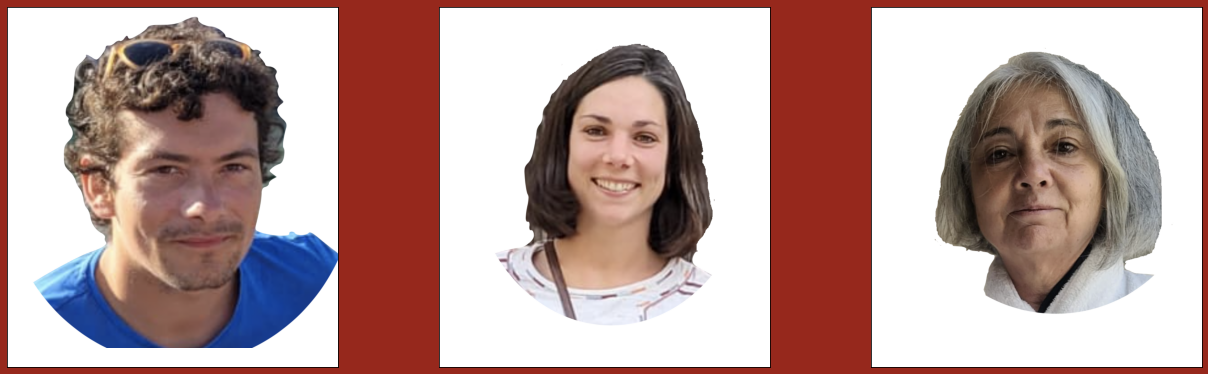

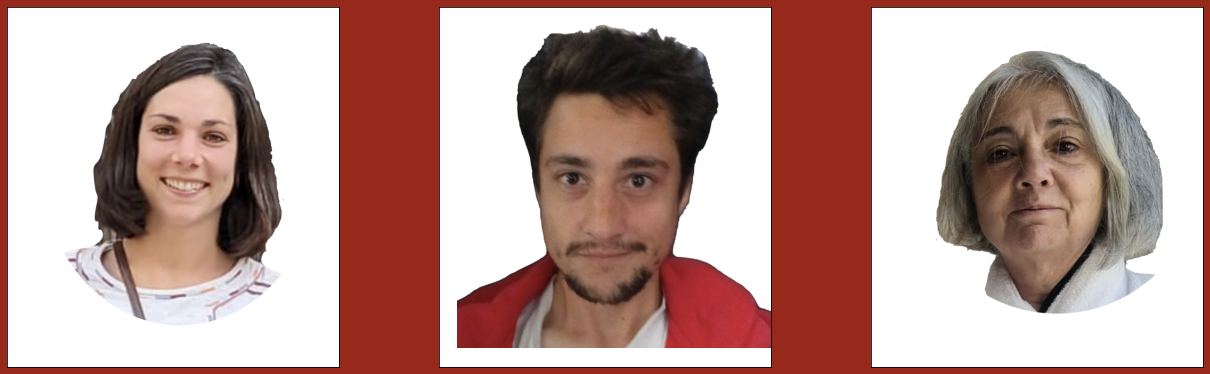

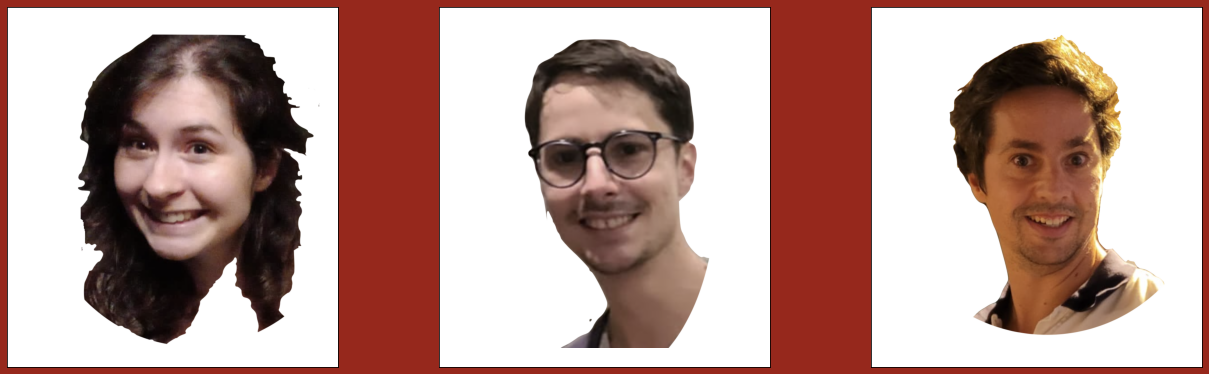

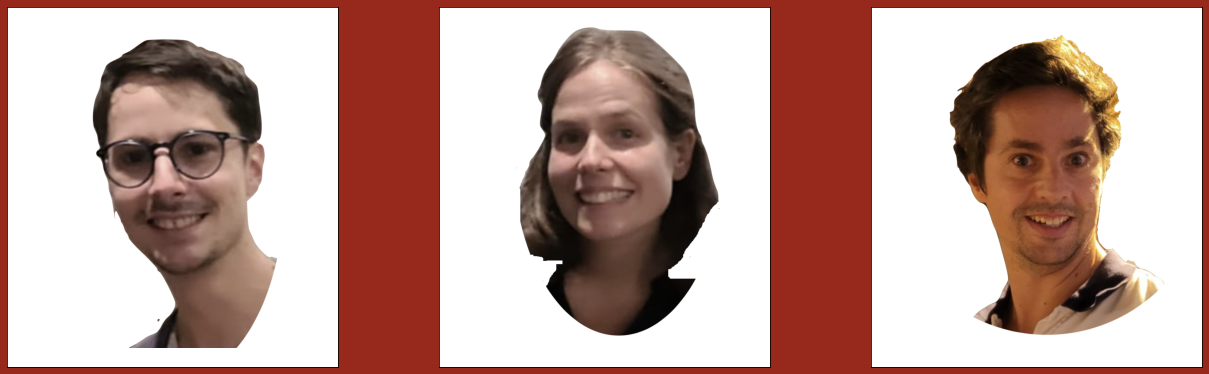

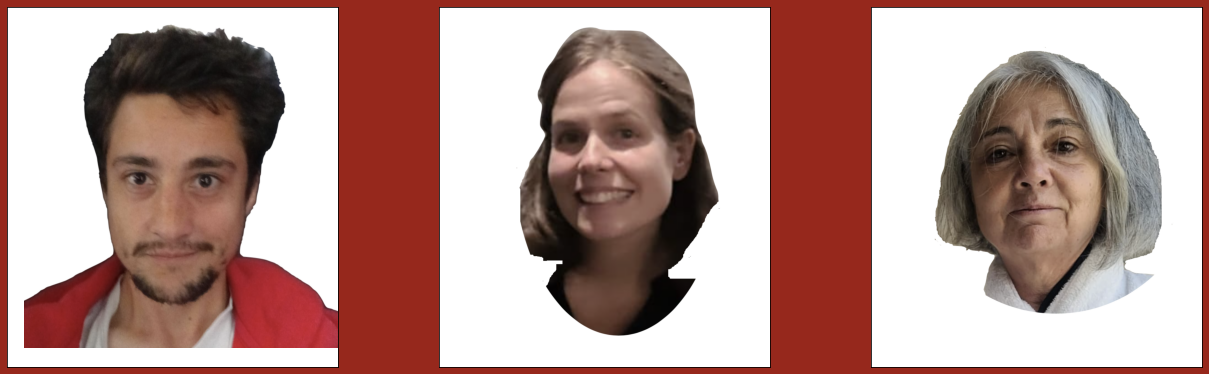

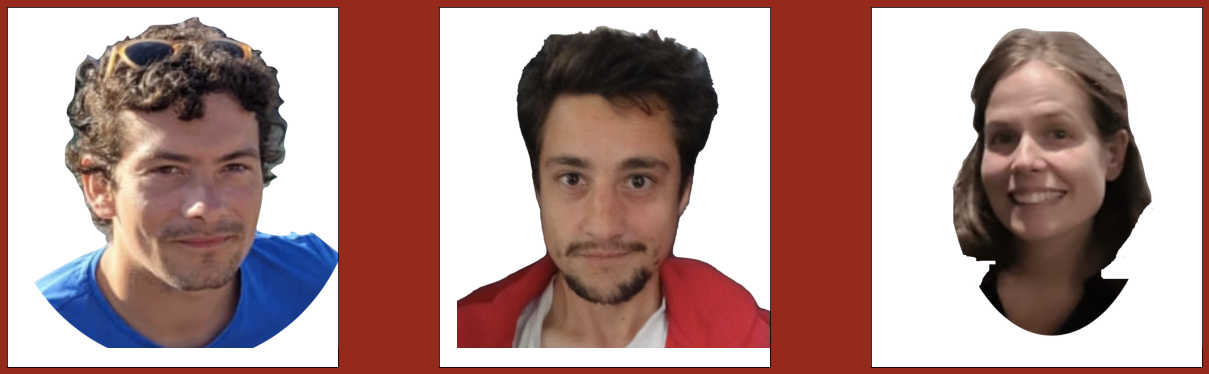

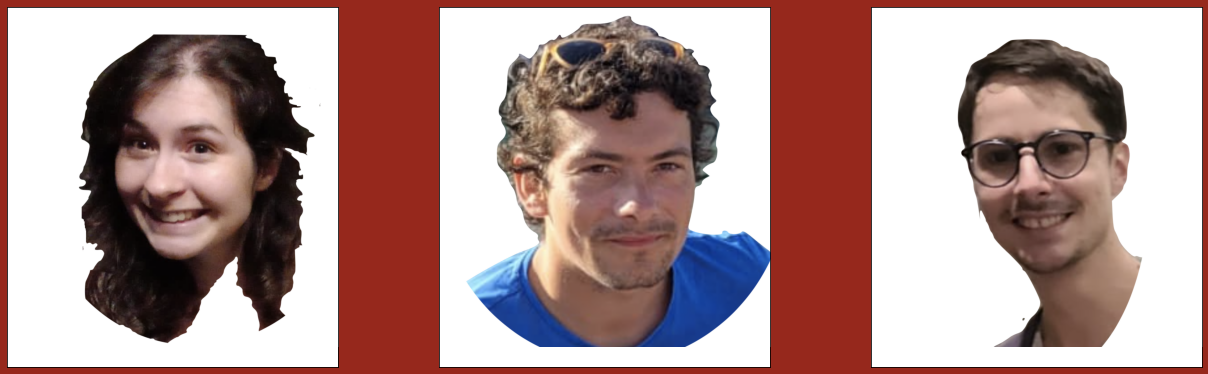

In [17]:
#gifter="PA"
total_frames_fireworks = 50
people = list(family_dict.keys())

for gifter in people:
#    print(gifter,"gifts to:",family_dict[gifter]["gifts_to"])
    print("Generating video for ",gifter)
    create_video(gifter,family_dict,total_frames_0, total_frames_fireworks)
#wrong display: is it because it doesn't show the last image of the video or because the last image of the video is wrong (then see previous comments)


In [18]:
def copy_files(gifter,family_dict):
    print("gifter",gifter)
    gifted=family_dict[gifter]["gifts_to"]
#    print("gifted",gifted)
    if not os.path.isdir(os.path.join(gifter,"lutins")):
        os.mkdir(os.path.join(gifter,"lutins"))
    for i in range(3):
 #       print("gifted",i,gifted[i])
        shutil.copy("pics/"+gifted[i]+".png",os.path.join(gifter,"gifted"+str(i+1)+".png"))
        lutins = [person for person, details in family_dict.items() if gifted[i] in details["gifts_to"]]
        other_lutins = [giver for giver in lutins if giver != gifter ]
  #      print("other_lutins",other_lutins)
        for j in range(2):
            shutil.copy(os.path.join("pics/lutins",other_lutins[j]+".jpg"),os.path.join(gifter,"lutins/lutin"+str(i+1)+str(j+1)+".jpg"))

In [19]:
print(people)
for gifter in people:       
    copy_files(gifter,family_dict)

['Maman', 'PA', 'Lidia', 'Claire', 'Adrien', 'Arnaud', 'AL', 'Hubert']
gifter Maman
gifter PA
gifter Lidia
gifter Claire
gifter Adrien
gifter Arnaud
gifter AL
gifter Hubert


In [20]:
output = str(family_dict)

# Specify the file name where you want to write the output
file_name = "summary_presents.txt"

# Open the file in write mode and write the output to it
with open(file_name, "w") as file:
    file.write(output)
